# Proyek Analisis Data: Bike Sharing Dataset

* **Nama:** Wahyu Setiawan
* **Email:** wawanslf81@gmail.com
* **ID Dicoding:** ws_2002

## Menentukan Pertanyaan Bisnis

* Bagaimana distribusi pengguna sewa sepeda terhadap musim yang berbeda? 
* Bagaimana performa pelanggan terdaftar pada saat holiday?
* Bagaimana performa pelanggan biasa pada saat hari kerja?
* Apakah kondisi cuaca mempengaruhi pengguna sepeda pada musim tertentu?
* Bagaimana performa sewa sepeda pada tahun 2011?

## Import Semua Packages/Library yang Digunakan 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wragling

### Data Gathering

In [4]:
bike = pd.read_csv('./data/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [5]:
print('jumlah duplikat: ', bike.duplicated().sum())

jumlah duplikat:  0


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

mengubah tipe data dteday menjadi datetime

In [8]:
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%Y-%m-%d')

In [9]:
bike.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [10]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Correlaation Data

In [17]:
bike_corr = bike.corr()
bike_corr

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


## EDA
### Explore
#### Pivot Table

In [18]:
byseason = bike.groupby('season')['cnt'].sum().reset_index()
byseason

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [19]:
byholiday = bike.groupby('holiday')['registered'].mean().sort_values(ascending=False).reset_index()
byholiday

,holiday,registered
0,0,3685.332394
1,1,2670.285714


In [20]:
byworking_day = bike.groupby('workingday')['casual'].mean().sort_values(ascending=False).reset_index()
byworking_day

,workingday,casual
0,0,1371.134199
1,1,606.570000


In [21]:
byseason_weather = bike.groupby(['season', 'weathersit'])['cnt'].sum().reset_index()
byseason_weather

,season,weathersit,cnt
0,1,1,312036
1,1,2,155573
2,1,3,3739
3,2,1,626986
4,2,2,288096
5,2,3,3507
6,3,1,799443
7,3,2,250679
8,3,3,11007
9,4,1,519487


In [22]:
bike_2011 = bike[bike['yr'] == 0]

bike_2011_df = bike_2011.groupby('mnth')['cnt'].sum().reset_index()
bike_2011_df

,mnth,cnt
0,1,38189
1,2,48215
2,3,64045
3,4,94870
4,5,135821
5,6,143512
6,7,141341
7,8,136691
8,9,127418
9,10,123511


### Visualization & Explanatory Analysis

#### Bagaimana distribusi pengguna sewa sepeda terhadap musim yang berbeda? 

In [23]:
byseason_labels = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
byseason['season'] = byseason['season'].map(byseason_labels)

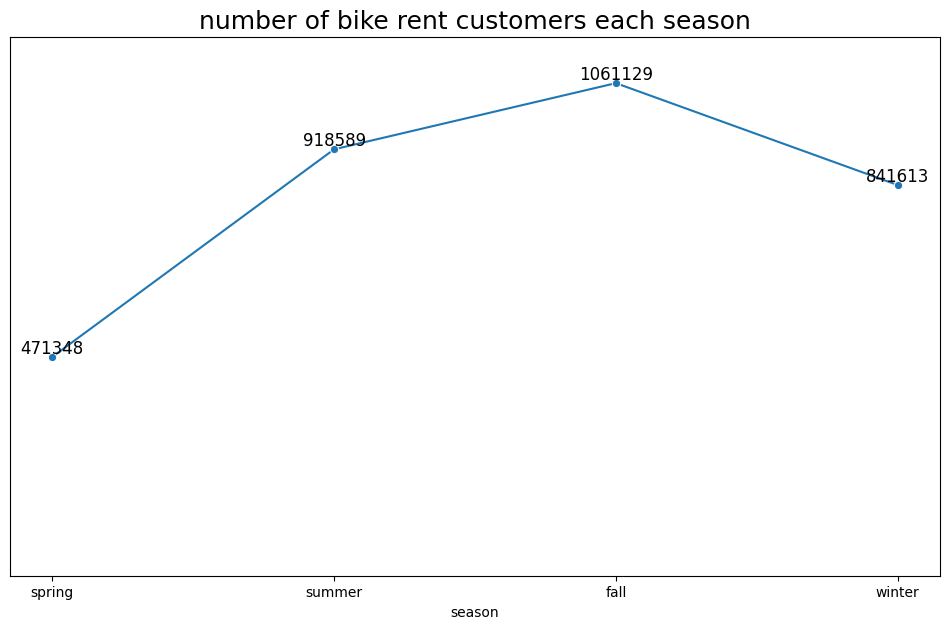

In [24]:
plt.figure(figsize=(12, 7))

sns.lineplot(x='season', y='cnt', data=byseason, marker='o')
plt.title('number of bike rent customers each season', fontsize=18)
plt.gca().set_yticks([])
plt.ylim(0, max(byseason['cnt']) + 100000)
for x, y in zip(byseason['season'], byseason['cnt']):
    plt.text(x=x, y=y, s=f'{y}', ha='center', va='bottom', fontsize=12, color='black')
plt.ylabel('')
plt.show()

berdasarkan data performa total pelanggan tertinggi terdapat pada musim gugur.

#### Bagaimana performa pelanggan terdaftar pada saat holiday?

In [25]:
byholiday_labels = {0: 'non_holiday', 1: 'holiday'}
byholiday['holiday'] = byholiday['holiday'].map(byholiday_labels)

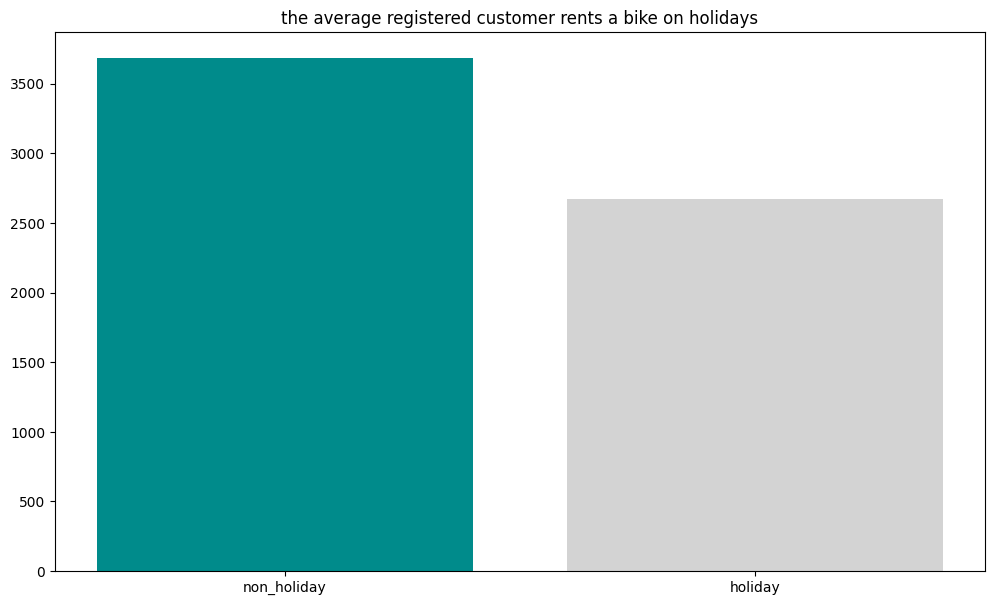

In [26]:
plt.figure(figsize=(12, 7))

colors = ["#008B8B", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.bar(byholiday['holiday'], byholiday['registered'], color=colors)
plt.title('the average registered customer rents a bike on holidays')
plt.show()


berdasarkan data rata - rata pelanggan yang terdaftar di sewa sepeda. data penyewa sepeda pada saat non holiday (hari biasa) cenderung lebih besar.

#### Bagaimana performa pelanggan biasa pada saat hari kerja?

In [27]:
byworking_day_labels = {0: 'non_workingday', 1: 'workingday'}
byworking_day['workingday'] = byworking_day['workingday'].map(byworking_day_labels)

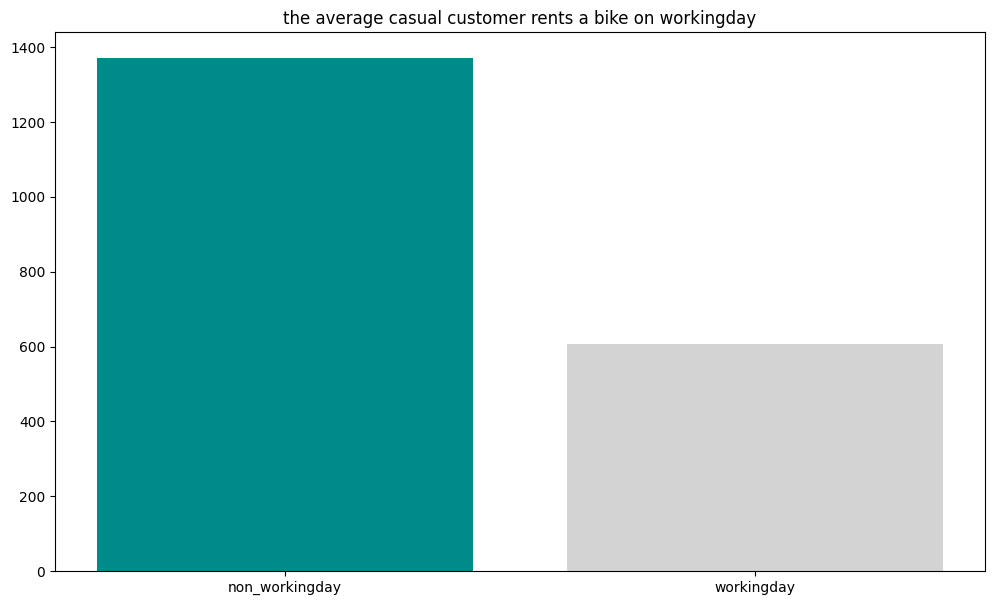

In [28]:
plt.figure(figsize=(12, 7))

plt.bar(byworking_day['workingday'], byworking_day['casual'], color=colors)
plt.title('the average casual customer rents a bike on workingday')
plt.show()

Berdasarkan data pelanggan biasa di sewa sepeda. pelanggan biasa cenderung menyewa sepeda saat hari libur kerja.

#### Apakah kondisi cuaca mempengaruhi pengguna sepeda pada musim tertentu?

In [29]:
byseason_weather_labels1 = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
byseason_weather['season'] = byseason_weather['season'].map(byseason_weather_labels1)

In [30]:
byseason_weather_labels2 = {1: 'clear weather or partly sunny weather', 
                          2: 'foggy or cloudy weather', 
                          3: 'rainy or snowy weather'}
byseason_weather['weathersit'] = byseason_weather['weathersit'].map(byseason_weather_labels2)

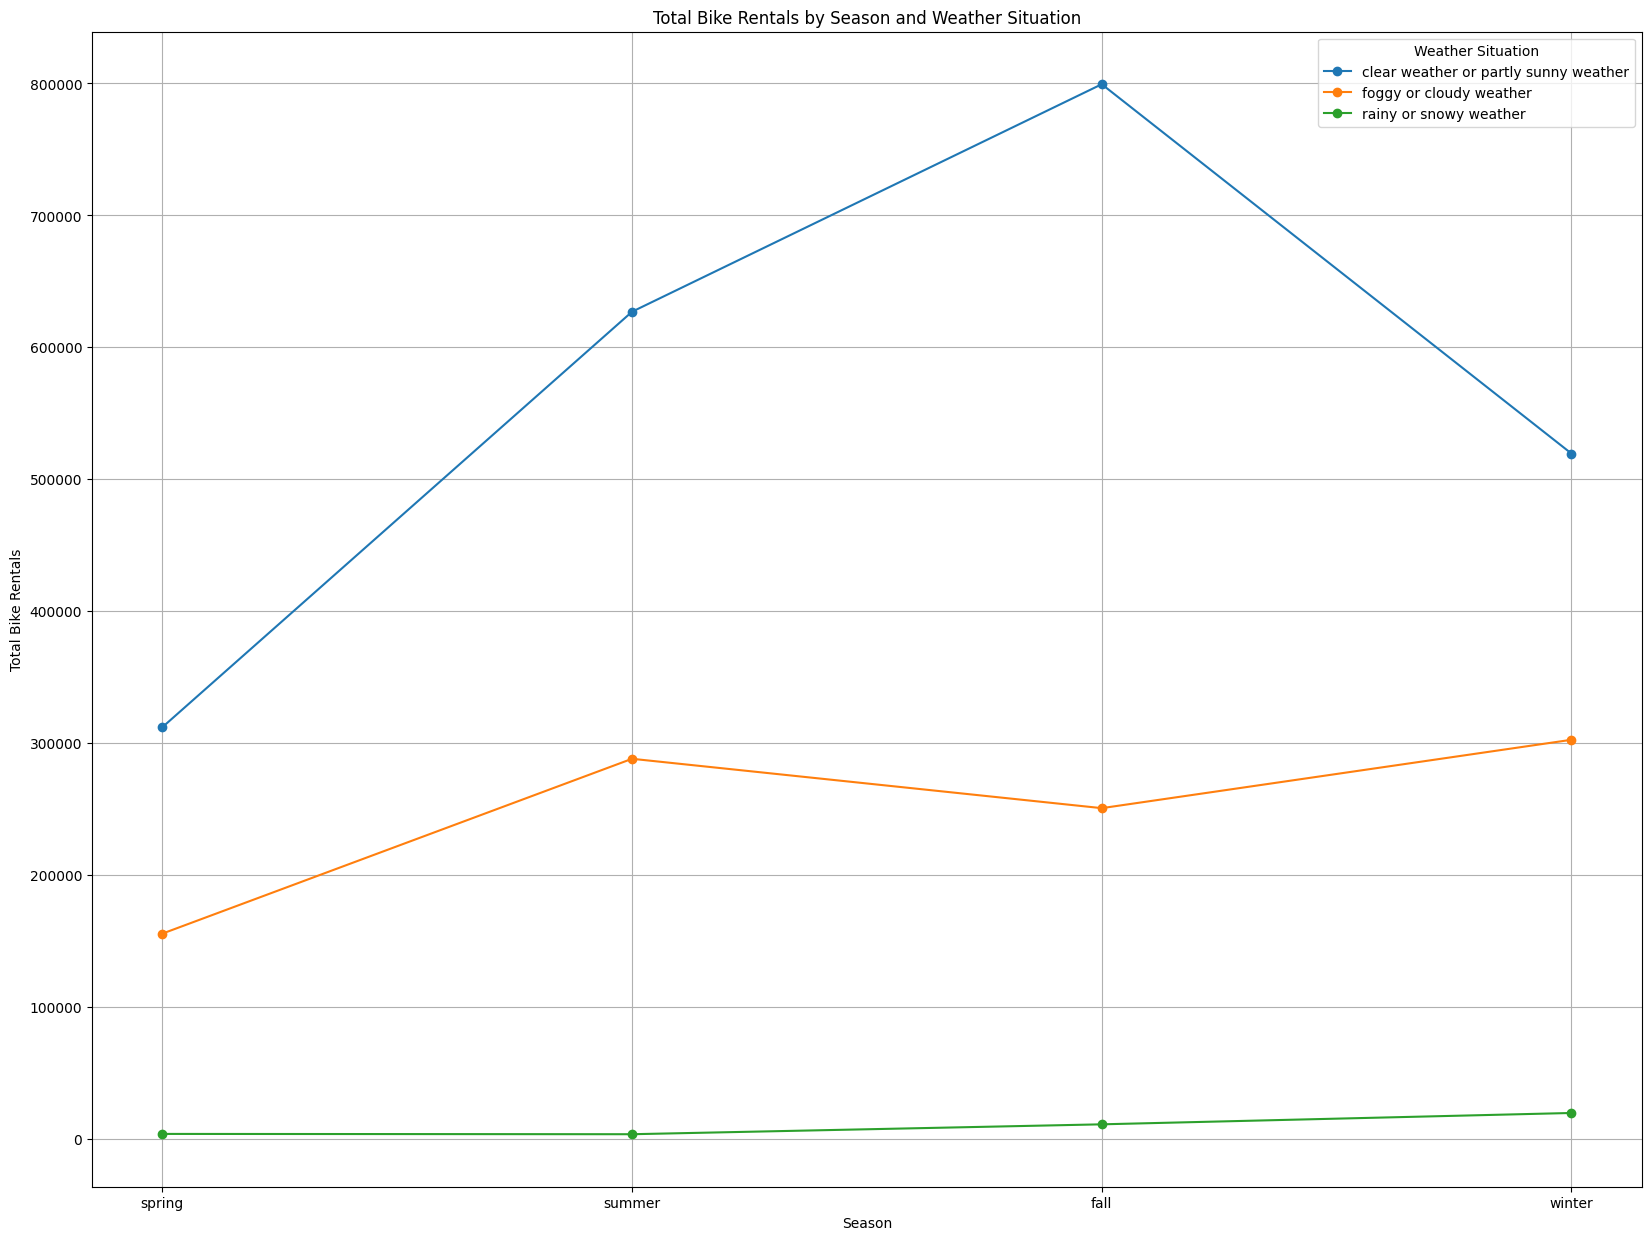

In [31]:
plt.figure(figsize=(20, 15))

for weather in byseason_weather['weathersit'].unique():
    subset = byseason_weather[byseason_weather['weathersit'] == weather]
    plt.plot(subset['season'], subset['cnt'], marker='o', label=f'{weather}')

plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Season and Weather Situation')
plt.legend(title='Weather Situation')
plt.grid(True)

plt.show()

Berdasarkan data, faktor cuaca dan musim tertentu sangat mempengaruhi pelanggan untuk mendorong menyewa sepeda. terlihat data pada saat cuaca cerah atau cerah sebagian terdapat lebih banyak pelanggan yang menyewa sepeda ketimbang pada saat cuaca berkabut atau berawan dan cuaca hujan atau salju

#### Bagaimana performa sewa sepeda pada tahun 2011? apakah terdapat peningkatan di bulan - bulan tertentu?

In [32]:
bike_2011_df['mnth'] = pd.to_datetime(bike_2011_df['mnth'], format='%m')
bike_2011_df['mnth'] = bike_2011_df['mnth'].dt.strftime('%B')

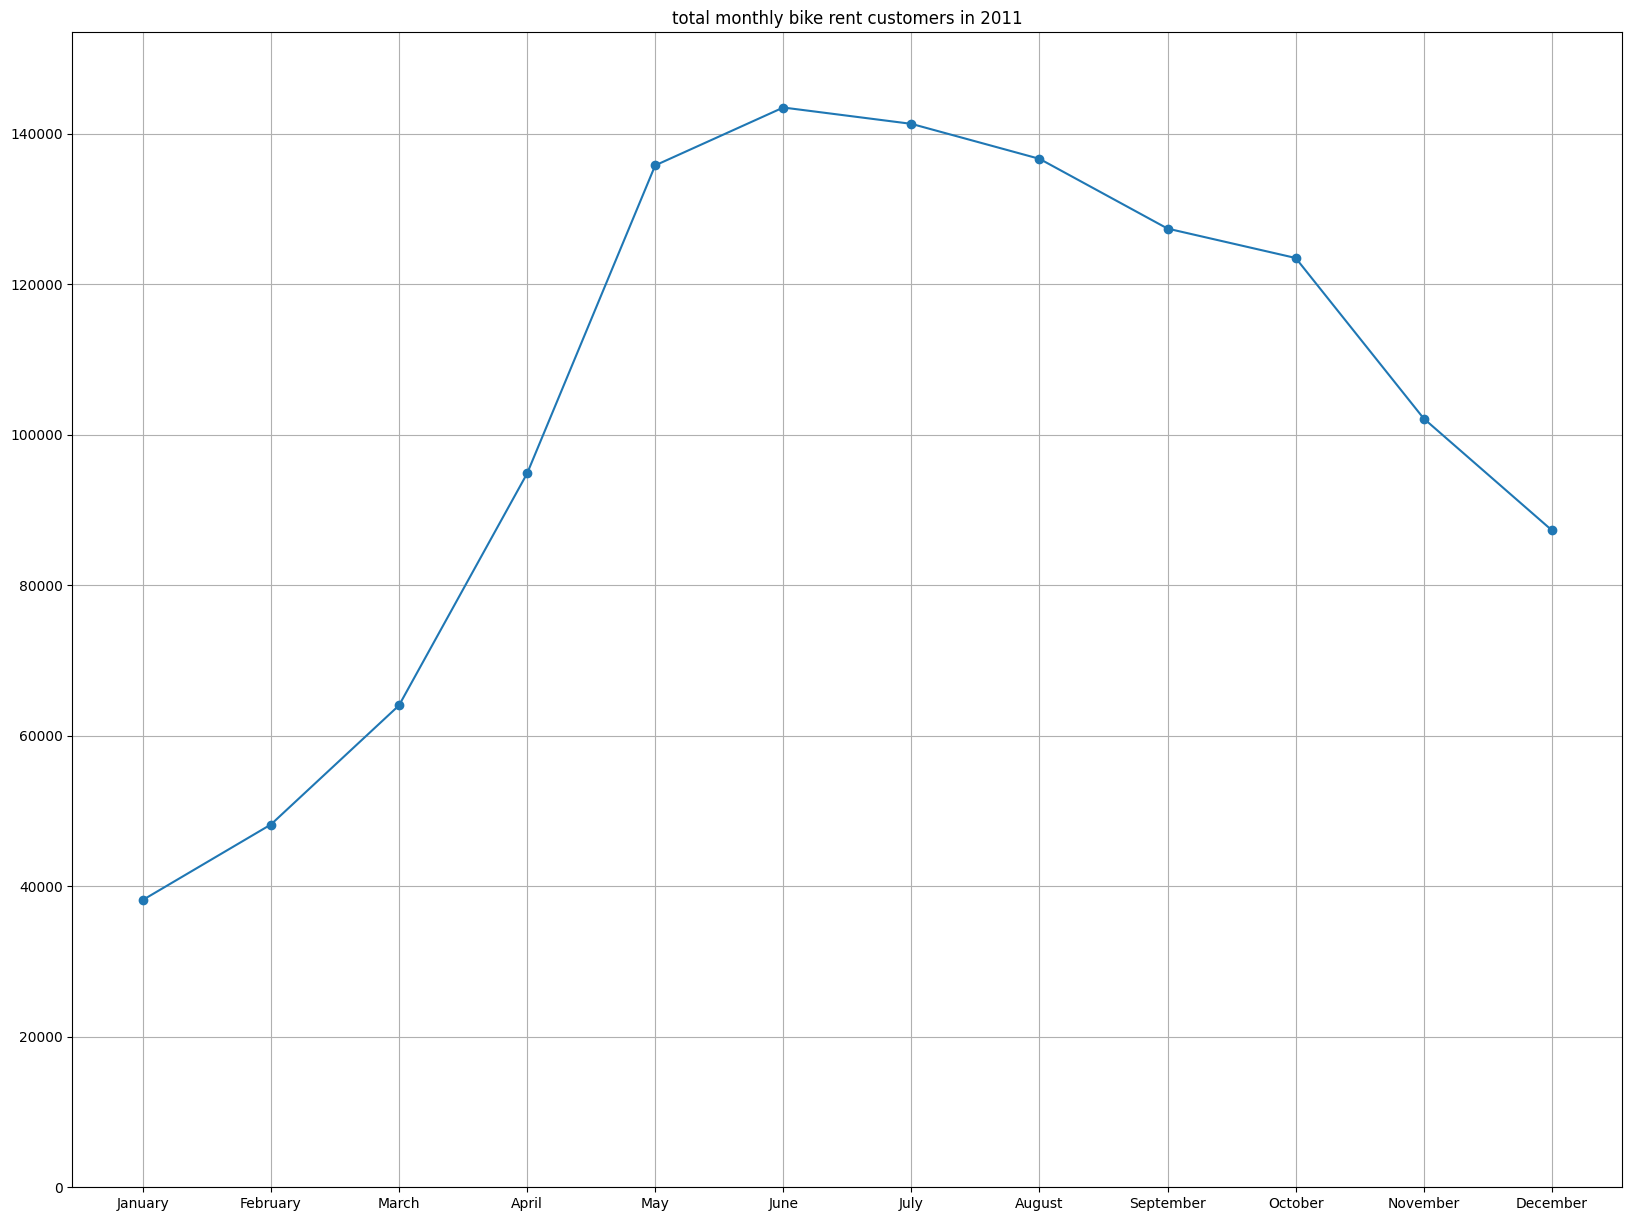

In [33]:
plt.figure(figsize=(20, 15))

plt.plot(bike_2011_df['mnth'], bike_2011_df['cnt'], marker='o')
plt.ylim(0, max(bike_2011_df['cnt']) + 10000)
plt.title('total monthly bike rent customers in 2011')
plt.grid()
plt.show()

berdasarkan data sewa sepeda pada tahun 2011, terdapat peningkatan dari bulan Januari hingga puncaknya pada bulan Juni.

### Conclusion
* **Pertanyaan 1:** Jumlah pelanggan sewa sepeda pada musim panas (summer) mengalami peningkatan yang signifikan hingga puncaknya pada musim gugur (fall).
* **Pertanyaan 2:** Performa pelanggan terdaftar pada saat hari libur (holiday) cenderung lebih rendah daripada saat hari biasa (non holiday). 
* **Pertanyaan 3:** Performa pelanggan biasa cenderung lebih rendah pada saat hari kerja ketimbang saat libur kerja.
* **Pertanyaan 4:** Kondisi cuaca pada setiap musim sangat mempengaruhi seseorang untuk bersepeda.
* **Pertanyaan 5:** pada tahun 2011 terdapat tren peningkatan jumlah pelanggan dimulai dari Januari hingga puncaknya pada bulan Juni. 

In [29]:
bike.to_csv('bike.csv', index=False)